<a href="https://colab.research.google.com/github/cairoegito/Fraudes-Bancarias/blob/main/Previs%C3%A3o_de_fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEMA DE NEGÓCIO**

Vamos analisar e prever possíveis transações fraudulentas baseado no histórico dessa respectiva empresa.

**IMPORTANDO BIBLIOTECAS**

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Bibliotecas de visualização e tratamento de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder 

#Bibliotecas de previsão e ajustes do modelo preditivo
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Bibliotecas para checar confiabilidade do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

**IMPORTAÇÃO E TRATAMENTO DO DATAFRAME**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/desafio classificaçao/fraud_detection_dataset.csv")

In [ ]:
#Visualizando primeiras informações
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
#Analisando as variáveis
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.831603e+06,2.831602e+06,2.831602e+06,2.831602e+06,2.831602e+06,2.831602e+06,2.831602e+06,2.831602e+06
mean,1.180058e+02,1.568998e+05,8.481636e+05,8.694701e+05,9.932999e+05,1.101131e+06,8.952529e-04,3.531570e-07
std,7.399918e+01,2.656039e+05,2.924614e+06,2.960980e+06,2.298450e+06,2.382621e+06,2.990739e-02,5.942701e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.700000e+01,1.238824e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.390000e+02,7.584129e+04,1.475700e+04,0.000000e+00,1.365850e+05,2.225718e+05,0.000000e+00,0.000000e+00
75%,1.830000e+02,2.108893e+05,1.145577e+05,1.536422e+05,9.429538e+05,1.128385e+06,0.000000e+00,0.000000e+00
max,2.260000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.228378e+07,4.265577e+07,1.000000e+00,1.000000e+00


In [ ]:
# Observando o tamanho de nosso dataframe
df.shape

(2831603, 11)

In [ ]:
# Pegando uma amostragem do dataset pois o original tem um número extremamente elevado de dados
df_amostra = df.sample(frac=.2)

Text(0.5, 0, 'oldbalanceOrg')

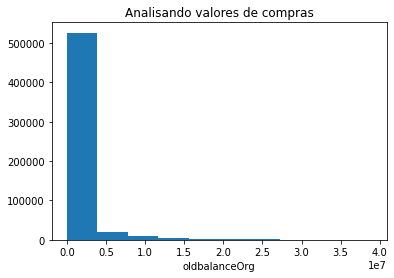

In [ ]:
# Verificando possíveis outliers de variáveis importantes (valores fora do padrão)
ax = plt.hist(x= df_amostra["oldbalanceOrg"])
plt.title("Analisando valores de compras")
plt.xlabel("oldbalanceOrg")

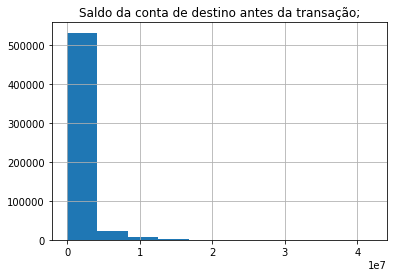

In [ ]:
# Verificando possíveis outliers de variáveis importantes (valores fora do padrão)
df_amostra["oldbalanceDest"].hist()
plt.title("Saldo da conta de destino antes da transação;")
plt.show()

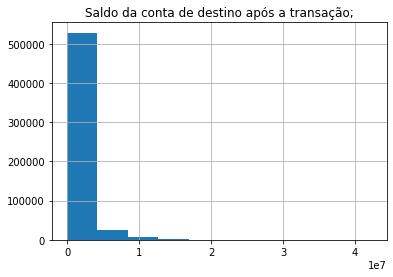

In [ ]:
# Verificando possíveis outliers de variáveis importantes (valores fora do padrão)
df_amostra["newbalanceDest"].hist()
plt.title("Saldo da conta de destino após a transação;")
plt.show()

In [ ]:
#Verificando a existência de missings(NaN)
df_amostra.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Analisando o dataset resultante
df_amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566321 entries, 159568 to 2024526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            566321 non-null  int64  
 1   type            566321 non-null  object 
 2   amount          566321 non-null  float64
 3   nameOrig        566321 non-null  object 
 4   oldbalanceOrg   566321 non-null  float64
 5   newbalanceOrig  566321 non-null  float64
 6   nameDest        566321 non-null  object 
 7   oldbalanceDest  566321 non-null  float64
 8   newbalanceDest  566321 non-null  float64
 9   isFraud         566321 non-null  float64
 10  isFlaggedFraud  566321 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 51.8+ MB


In [ ]:
#Valores únicos de fraudes
df_amostra[["isFraud"]].value_counts()

isFraud
0.0        565782
1.0           539
dtype: int64

In [ ]:
#Verificando  correlações
df_amostra.corr()["isFraud"].sort_values(ascending= False)

isFraud           1.000000
amount            0.144076
oldbalanceOrg     0.006654
newbalanceDest    0.002861
step             -0.003049
oldbalanceDest   -0.005514
newbalanceOrig   -0.008294
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

**ALGORITMO DE PREVISÃO - CLASSIFICAÇÃO**

In [ ]:
# Início da transformação de variáveis categóricas
label_encoder_type = LabelEncoder()
label_encoder_nameOrig = LabelEncoder()
label_encoder_nameDest = LabelEncoder()

In [ ]:
df_amostra.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Definindo previsores e classe
x_amostra = df_amostra.iloc[:, 0:9].values
y_amostra = df_amostra.iloc[:, 9].values


In [ ]:
#Transformando as variáveis
x_amostra[:,1] = label_encoder_type.fit_transform(x_amostra[:, 1])
x_amostra[:,3]= label_encoder_type.fit_transform(x_amostra[:,3])
x_amostra[:,6] = label_encoder_type.fit_transform(x_amostra[:, 6])


In [ ]:
# Balanceando as classes
smt = SMOTE()

In [ ]:
# Balanceando por oversampling (Aumentar os dados em menor quantidade)
x_amostra, y_amostra = smt.fit_resample(x_amostra, y_amostra)

In [ ]:
print(x_amostra.shape, y_amostra.shape)

(1131564, 9) (1131564,)


In [ ]:
# Contagem da fraude após smote
yi= y_amostra.astype(int)
np.bincount(yi)

array([565782, 565782])

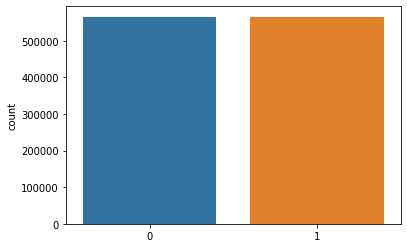

In [ ]:
# Verificando balanceamento de dataset
ax = sns.countplot(x=yi)

In [ ]:
# Treinando dados para teste e previsão
x_train, x_value, y_train, y_value = train_test_split(x_amostra, y_amostra, test_size= 0.3, random_state=7)

**CRIANDO MÁQUINA PREDITIVA XGBoost**

In [ ]:
modelo = XGBClassifier()

In [ ]:
#Treinando o modelo
modelo = modelo.fit(x_train, y_train)
modelo

XGBClassifier()

In [ ]:
#Passando novos dados
y_predict = modelo.predict(x_value)

In [ ]:
# Criando gabarito para analisar os resultados
gabarito = pd.DataFrame({"Gabarito" : y_value, "Previsoes da máquina": y_predict})
gabarito

,Gabarito,Previsoes da máquina
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
339465,0.0,0.0
339466,0.0,0.0
339467,0.0,0.0
339468,0.0,0.0


In [ ]:
# Analisando as métricas desse modelo de previsão e sua confiabilidade 
print("Classification metrics: \n" , classification_report(y_value, y_predict))
print("Acurácia: \n", accuracy_score(y_value, y_predict))
print("Confusion matrix: \n", confusion_matrix(y_value, y_predict) )

Classification metrics: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    169418
         1.0       1.00      1.00      1.00    170052

    accuracy                           1.00    339470
   macro avg       1.00      1.00      1.00    339470
weighted avg       1.00      1.00      1.00    339470

Acurácia: 
 0.9997083689280348
Confusion matrix: 
 [[169326     92]
 [     7 170045]]


**MÉTODO Random Forest**

In [ ]:
#Criando o modelo
modelo2 = RandomForestClassifier()

In [ ]:
#Treinando o modelo
modelo2 = modelo2.fit(x_train, y_train)
modelo2

RandomForestClassifier()

In [ ]:
# Passando dados novos (de teste) para o modelo
y_predict = modelo2.predict(x_value)

In [ ]:
# Avaliando com gabarito
gabarito2 = pd.DataFrame({"Gabarito" : y_value, "Previsoes da máquina": y_predict})
gabarito2

,Gabarito,Previsoes da máquina
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
339465,0.0,0.0
339466,0.0,0.0
339467,0.0,0.0
339468,0.0,0.0


In [ ]:

# Analiasando as métricas desse modelo de previsão e sua confiabilidade 
print("Classification metrics: \n" , classification_report(y_value, y_predict))
print("Acurácia: \n", accuracy_score(y_value, y_predict))
print("Confusion matrix: \n", confusion_matrix(y_value, y_predict) )

Classification metrics: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    169418
         1.0       1.00      1.00      1.00    170052

    accuracy                           1.00    339470
   macro avg       1.00      1.00      1.00    339470
weighted avg       1.00      1.00      1.00    339470

Acurácia: 
 0.9997083689280348
Confusion matrix: 
 [[169326     92]
 [     7 170045]]


# A diagonal  principal na matriz de confusão nos indica que os valores acertados são exorbitantemente mais altos que os de erro. Temos 7 equívocos de  fraudes e 92 de não fraudes

**RESUMO**

- Um modelo mais simples, o Random, gerou uma previsão de maior acurácia e confiabilidade
- Tratamento de classes desbalanceadas é fundamental para potencializar o modelo preditivo
- Estudo das variáveis do dataset é essencial para os modelos de machine learning
- Oversampling tem a vantagem de manter valores verdadeiros e manipular somente os da classe que possuia menor amostra de dados